# 1B2. Práctica: Cálculo de frecuencias a nivel de palabras

### Alumno: **Luis Fernando Izquierdo Berdugo**
### Materia: **Procesamiento de Información**
### Fecha: **20 de Agosto de 2024**

**Instrucciones**:

Crear un notebook para preprocesar el texto y convertirlo a minúsculas, quitar acentos y los siguientes caracteres:

`;:,.\\-\"'/()[]¿?¡!{}~<>|«»-—’\t\n\r`

1. Calcular las frecuencias a nivel de palabras de los siguientes documentos.
    - Libro 1
    - Libro 2

Generar los histogramas para cada archivo.

2. En el notebook, responder las siguientes preguntas:

    - ¿Cuántas palabras hay en cada texto?
    - ¿Cuántas palabras diferentes (palabras únicas) hay en el texto?
    - ¿Cuántas son las palabras con frecuencia 1 (hapax legomena) en el texto? 
    - Generar los histogramas de todos los documentos.  Para generar los histogramas, ordenar las palabras de acuerdo a la frecuencia de mayor a menor. Si el número de datos es excesivo y difícil de visualizar, presente los datos que considere convenientes, para que se aprecien, de forma adecuada, los datos graficados.

## Inciso 1

Lo primero que se hará para calcular la frecuencia de las palabras será identificar las "stopwords", estas son las palabras que carecen de significado al encontrarse por si solas, en español suelen ser los conectores como "de", "donde", "para", etc.
El módulo de python "nltk" tiene un listado de estas en español, por lo que se descargará este, de igual manera se importa el módulo ssl debido a que al intentar descargar las palabras aparece un prompt de la descarga en la terminal, sin embargo, debido a la utilización de VS Code para el desarrollo de esta notebook, no encontramos dicho prompt, así que se hace un manejo de errores para pasar este obstáculo.

La función para remover las **stopwords** simplemente tomará el texto e iterará sobre las palabras en la separación de este, si una de estas es una stopword, continua con el proceso, en el caso contrario, las añade a una lista, que se devolverá como un texto unido por espacios al final de la función.

In [12]:
from nltk.corpus import stopwords
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
_STOPWORDS = stopwords.words('spanish')
print(_STOPWORDS)

def remove_stopwords(text):
    text_nostop = []
    for word in text.split():
        if word in _STOPWORDS:
            continue
        else:
            text_nostop.append(word)
    return ' '.join(text_nostop)


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/izluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Existen varios tipos de codificación para archivos de texto, (como "UTF-8"). Una de las principales diferencias es el proceso para guardar los caracteres de acentuación.
En el caso de UTF-8 se guarda la letra con el acento "pegado", guardando todo como un solo carácter "á". En otros casos de codificación se guardan como dos caracteres diferentes, siendo el resultado "a´".
Esto es de ayuda para la eliminación de acentos, ya que, al sustituir el carácter "´" por un espacio vacío "" se elimina el acento de la letra.

La problemática que se encuentra con los textos "libro_1" y "libro_2" es que están codificados de la manera en que la letra con acento es un solo carácter, por lo cual se creo la función "remove_accents" para hacer la sustitución de los acentos manteniendo la letra equivalente.
Se usa el módulo "unicodedata" que guarda la base de datos de caracteres unicode, con la función "normalize" se descomponen los caracteres en el texto en su información base y marcas añadidas ("á" se convierte en "a´"), a esto refiere con el parametro 'NFD' (Normalization Form Canonical Decomposition). El final de la función revisa si el carácter pertenece a la categoría "Mn" que es "non-spacing mark" (son aquellos signos que no generan un espacio, como los acentos) y no deja que pasen a la unión de todo el texto.

In [13]:
import unicodedata

def remove_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

Los últimos pasos en la preparación de los datos para su posterior análisis serán:
- Convertir todo el texto a minúsculas con la función "lower" de python.
- La eliminación de los caracteres especiales `;:,.\\-\"'/()[]¿?¡!{}~<>|«»-—’\t\n\r`, esta se dividió en 2 partes:
    1. Sustitución de los caracteres de espaciado `\t`y `\n` por un carácter de espacio `" "` para evitar la generación de palabras combinadas como "elsiguiente" en vez de "el siguiente".
    2. Eliminación de los caracteres especiales `;:,.\\-\"'/()[]¿?¡!{}~<>|«»-—’\r`.

En esta parte también se usan las funciones creadas previamente para eliminar las stopwords y los acentos, así como la apertura de los textos en cada caso.

In [14]:
import re   

file = open("libro_1.txt", "r")
libro_1 = file.read()
file.close()
libro_1 = libro_1.lower()
libro_1_nostop = remove_stopwords(libro_1)
libro_1_nostop = remove_accents(libro_1_nostop)
libro_1_nostop = re.sub(r"[\t\n]", " ", libro_1_nostop)
libro_1_nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\r]", "", libro_1_nostop)
libro_1 = remove_accents(libro_1)
libro_1 = re.sub(r"[\t\n]", " ", libro_1)
libro_1 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\r]", "", libro_1)


file = open("libro_2.txt", "r")
libro_2 = file.read()
file.close()
libro_2 = libro_2.lower()
libro_2_nostop = remove_stopwords(libro_2)
libro_2_nostop = remove_accents(libro_2_nostop)
libro_2_nostop = libro_2_nostop.lower()
libro_2_nostop = re.sub(r"[\t\n]", " ", libro_2_nostop)
libro_2_nostop = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\t\n\r]", "", libro_2_nostop)
libro_2 = remove_accents(libro_2)
libro_2 = re.sub(r"[\t\n]", " ", libro_2)
libro_2 = re.sub(r"[;:,.\-\"'/\(\)\[\]¿?¡!\{\}~<>|«»-—’\r]", "", libro_2)

Con todos los textos procesados correctamente, se procede a crear la función para calcular la frecuencia, la cual acepta dos parámetros:
- `text` Texto a analizar
- `top_n`Número de palabras que se desean devolver, esto es debido a la representación gráfica en histogramas que tendría problemas al mostrar tanta cantidad de datos únicos.

En esta función se usa el módulo "re" para encontrar todas (función "findall") las ocurrencias de 2 o más caracteres dentro del rango `[a-zA-Z_0-9]` (expresado por el patrón `\w+`).\
Se crea un diccionario vacío donde se guardaran las frecuencias y hacemos que busque en todas las palabras encontradas en el texto y las añada al diccionario o les añada 1 a su frecuencia.\
De igual manera se aprovechó esta función para hacer el conteo de las palabras únicas, las palabras que solo aparecen una vez y la suma total de palabras en el texto, lo cual será de utilidad en el inciso 2.\
Finalmente se ordenan los items dentro del diccionario por su frecuencia de mayor a menor y se devuelve este con un el límite que se dio por medio del atributo "top_n"

In [15]:

def frecuencia(text, top_n):
  words = re.findall(r'\w+', text)
  
  unique_words = set()
  words_once = []
  sum_words = 0
  
  frequency = {}
  for word in words:
    unique_words.add(word)
    frequency[word] = frequency.get(word, 0) + 1

  for word, count in frequency.items():
      sum_words = sum_words + count
      if count == 1:
          words_once.append(word)
  
  frequency = sorted(frequency.items(), key=lambda item: item[1], reverse=True)
  if top_n != 0:
    return frequency[:top_n]
  if top_n == 0:
    return frequency, unique_words, words_once, sum_words


Aquí se usa el módulo matplotlib para crear el histograma de las palabras, esta función acepta los siguientes parámetros:
- `word_frec`será el diccionario con las palabras y su frecuencia
- `nombre` será el nombre del texto analizado para el título de la gráfica
- `n` es el número de palabras reportadas en el resultado para el título de la gráfica.

In [16]:
import matplotlib.pyplot as plt

def histograma(word_frec, nombre, n):
  palabras, frecuencia = zip(*word_frec)
  plt.bar(palabras, frecuencia)
  plt.xlabel("Palabras")
  plt.ylabel("Frecuencia")
  plt.title(f"Top {n} palabras del {nombre}")
  plt.xticks(rotation=90)
  plt.show()


Al generar el **histograma del libro 1**, se hicieron varias pruebas para determinar cual era la muestra idónea de palabras para la visualización de los datos y se llegó a la conclusión de que 45 era un número correcto. De igual manera, el gráfico no muestra las stopwords, ya que para el análisis no son relevantes.

En el histograma del libro 1 se observa la gran presencia de `"si"` (con 581 apariciones) y `"no"` (con 402 apariciones). La presencia de `"si"` en el texto podría indicar un uso constante de condiciones o suposiciones como "si este levanta la cabeza" o "si lo hace en broma". 

Otro análisis importante sería la aparición constante de nombres propios como:
- `Augusto` - 359 veces
- `Eugenia` - 225 veces

Esto nos indicaría el nombre de nuestro personaje principal, Augusto, y otro personaje que también podría ser principal o mínimo una pieza clave en la historia, Eugenia.

[('si', 581), ('no', 402), ('usted', 370), ('augusto', 359), ('y', 291), ('que', 273), ('eugenia', 225), ('pues', 212), ('don', 205), ('mujer', 182), ('pero', 167), ('asi', 165), ('es', 153), ('hombre', 145), ('bien', 136), ('ahora', 131), ('yo', 130), ('casa', 130), ('sino', 119), ('como', 117), ('el', 113), ('eso', 110), ('se', 110), ('ser', 105), ('mismo', 103), ('dijo', 101), ('vez', 96), ('pobre', 92), ('ella', 92), ('ojos', 88), ('vida', 86), ('de', 84), ('fue', 80), ('luego', 79), ('cosas', 77), ('hacer', 75), ('dos', 75), ('decir', 74), ('solo', 74), ('tu', 74), ('despues', 73), ('madre', 73), ('dios', 72), ('aquella', 71), ('tan', 68)]


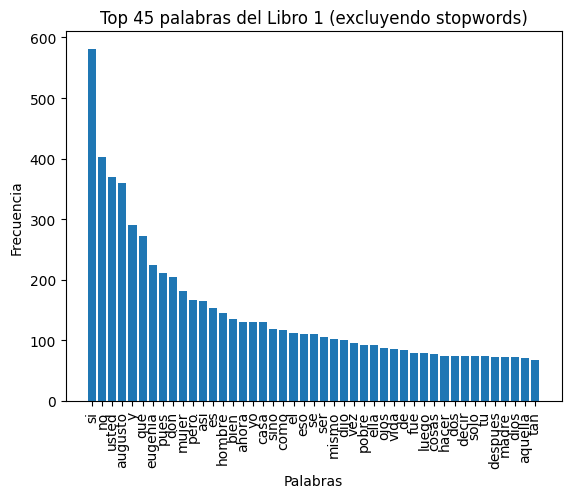

[('que', 2854), ('de', 2530), ('y', 2182), ('la', 1538), ('no', 1534), ('a', 1470), ('el', 1146), ('en', 946), ('se', 915), ('es', 878), ('lo', 685), ('si', 626), ('me', 615), ('un', 554), ('le', 507), ('como', 462), ('su', 444), ('por', 440), ('con', 431), ('una', 426), ('pero', 417), ('mi', 415), ('mas', 411), ('los', 408), ('usted', 370), ('yo', 359), ('augusto', 359), ('al', 337), ('las', 292), ('para', 272), ('del', 245), ('te', 237), ('eso', 226), ('eugenia', 225), ('esta', 217), ('o', 217), ('ha', 214), ('pues', 212), ('don', 205), ('ya', 201), ('tu', 195), ('ella', 186), ('mujer', 182), ('todo', 174), ('asi', 165)]


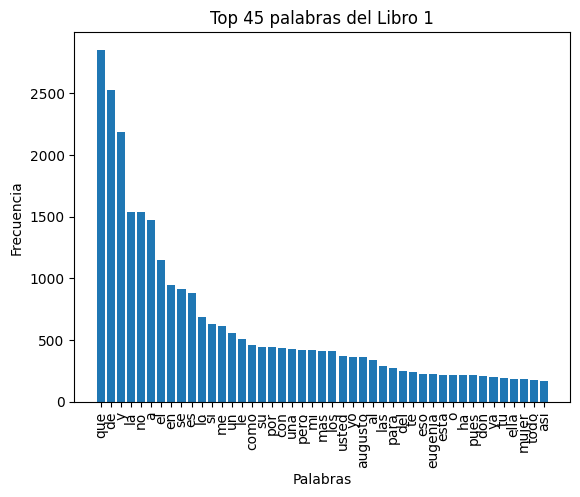

In [17]:
frecuencia_libro1_nostop = frecuencia(libro_1_nostop, 45)
print(frecuencia_libro1_nostop)
histograma(frecuencia_libro1_nostop, "Libro 1 (excluyendo stopwords)", 45)

frecuencia_libro1 = frecuencia(libro_1, 45)
print(frecuencia_libro1)
histograma(frecuencia_libro1, "Libro 1", 45)

En el **histograma del libro 2** se nota la presencia de la palabra "nela" (apareciendo 320 veces), así como de nuevo la presencia de "si" (con 264 apariciones).
- La palabra `"nela"` es un nombre propio, lo cual hace pensar que es el sujeto o personaje principal del texto.
- `"si"`, de la misma manera que en el libro anterior, puede indicar el uso de condiciones o suposiciones
- La aparición de `"ojos"`es curiosa, ya que hace pensar que se habla mucho sobre los ojos, ya sea del personaje principal o varios de los personajes de la historia.


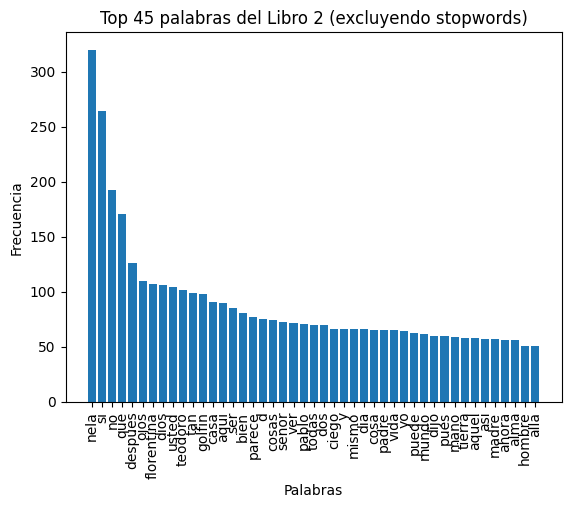

[('nela', 320), ('si', 264), ('no', 193), ('que', 171), ('despues', 126), ('ojos', 110), ('florentina', 107), ('dios', 106), ('usted', 104), ('teodoro', 102), ('tan', 99), ('golfin', 98), ('casa', 91), ('aqui', 90), ('ser', 85), ('bien', 81), ('parece', 77), ('d', 75), ('cosas', 74), ('senor', 73), ('ver', 72), ('pablo', 71), ('todas', 70), ('dos', 70), ('ciego', 66), ('y', 66), ('mismo', 66), ('dia', 66), ('cosa', 65), ('padre', 65), ('vida', 65), ('yo', 64), ('puede', 63), ('mundo', 62), ('dijo', 60), ('pues', 60), ('mano', 59), ('tierra', 58), ('aquel', 58), ('asi', 57), ('madre', 57), ('ahora', 56), ('alma', 56), ('hombre', 51), ('alla', 51)]


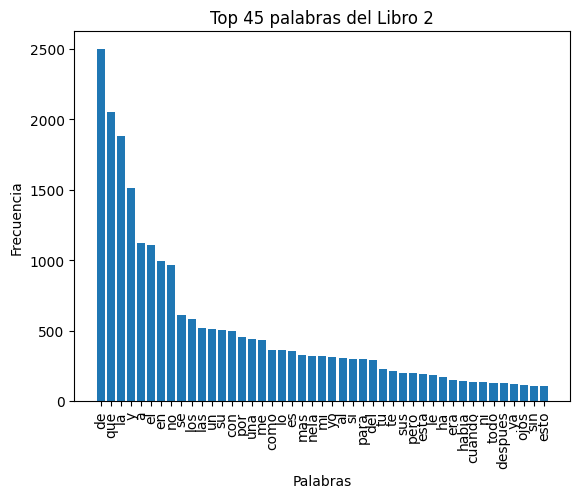

[('de', 2499), ('que', 2050), ('la', 1883), ('y', 1512), ('a', 1120), ('el', 1108), ('en', 993), ('no', 962), ('se', 613), ('los', 582), ('las', 516), ('un', 514), ('su', 502), ('con', 500), ('por', 453), ('una', 442), ('me', 430), ('como', 362), ('lo', 360), ('es', 356), ('mas', 327), ('nela', 320), ('mi', 319), ('yo', 313), ('al', 304), ('si', 299), ('para', 296), ('del', 291), ('tu', 228), ('te', 213), ('sus', 198), ('pero', 198), ('esta', 189), ('le', 181), ('ha', 173), ('era', 148), ('habia', 140), ('cuando', 138), ('ni', 134), ('todo', 129), ('despues', 126), ('ya', 124), ('ojos', 110), ('sin', 108), ('esto', 107)]


In [18]:
frecuencia_libro2nostop = frecuencia(libro_2_nostop, 45)
histograma(frecuencia_libro2nostop, "Libro 2 (excluyendo stopwords)", 45)
print(frecuencia_libro2nostop)

frecuencia_libro2 = frecuencia(libro_2, 45)
histograma(frecuencia_libro2, "Libro 2", 45)
print(frecuencia_libro2)

## Inciso 2

Para este inciso se hizo el análisis tanto con los textos procesados para quitar "stopwords", como para los textos originales únicamente con el procesamiento para eliminar caracteres especiales.

In [19]:
frecuencia_libro1, unicos_libro1, hapax_libro1, total_libro1 = frecuencia(libro_1, 0)
frecuencia_libro1nostop, unicos_libro1nostop, hapax_libro1nostop, total_libro1nostop = frecuencia(libro_1_nostop, 0)
print(f'Palabras únicas en el libro 1: {len(unicos_libro1)}')
print(f'Palabras que solamente aparecen una vez en el libro 1: {len(hapax_libro1)}')
print(f'Palabras totales en el libro 1: {total_libro1}\n')
print(f'Palabras únicas en el libro 1 sin stopwords: {len(unicos_libro1nostop)}')
print(f'Palabras que solamente aparecen una vez en el libro 1 sin stopwords: {len(hapax_libro1nostop)}')
print(f'Palabras totales en el libro 1 sin stopwords: {total_libro1nostop}')

Palabras únicas en el libro 1: 7782
Palabras que solamente aparecen una vez en el libro 1: 4694
Palabras totales en el libro 1: 56814

Palabras únicas en el libro 1 sin stopwords: 7702
Palabras que solamente aparecen una vez en el libro 1 sin stopwords: 4682
Palabras totales en el libro 1 sin stopwords: 30172


In [20]:
frecuencia_libro2, unicos_libro2, hapax_libro2, total_libro2 = frecuencia(libro_2, 0)
frecuencia_libro2nostop, unicos_libro2nostop, hapax_libro2nostop, total_libro2nostop = frecuencia(libro_2_nostop, 0)
print(f'Palabras únicas en el libro 2: {len(unicos_libro2)}')
print(f'Palabras que solamente aparecen una vez en el libro 2: {len(hapax_libro2)}')
print(f'Palabras totales en el libro 2 {total_libro2}\n')
print(f'Palabras únicas en el libro 2 sin stopwords: {len(unicos_libro2nostop)}')
print(f'Palabras que solamente aparecen una vez en el libro 2 sin stopwords: {len(hapax_libro2nostop)}')
print(f'Palabras totales en el libro 2 sin stopwords: {total_libro2nostop}')

Palabras únicas en el libro 2: 8496
Palabras que solamente aparecen una vez en el libro 2: 5213
Palabras totales en el libro 2 50540

Palabras únicas en el libro 2 sin stopwords: 8396
Palabras que solamente aparecen una vez en el libro 2 sin stopwords: 5194
Palabras totales en el libro 2 sin stopwords: 26654


Se puede observar que en ambos casos, al eliminar las "stopwords" vemos una variación de aproximadamente 80-100 palabras únicas y de 10-20 palabras que solamente aparecen una vez, sin embargo, al analizar las palabras totales en ambos casos vemos una reducción de entre el 40-50% de palabras. Esto se puede atribuir a que la mayoría de nexos (si no es que todos) son "stopwords" haciendo que todas y cada una de las oraciones de ambos libros pierdan palabras.